<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/agapi_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AtomGPT.org API (AGAPI) Client

https://github.com/atomgptlab/agapi

References to cite:

1. https://doi.org/10.1016/j.commatsci.2025.114063
2. https://doi.org/10.1007/s40192-025-00410-9

# Table of contents

1. Get your AtomGPT.org API key
2. General question-answer based on open source GPT-OSS-20b
3. Query JARVIS-DFT entries for a formula
4. JARVIS-DFT by element search
5. Get ALIGNN Predictions
6. Use ALIGNN-FF to relax atomic structure
7. Protein folding with ESM fold
8. XRD Pattern to atomic structure

Author: Kamal Choudhary (kchoudh2@jhu.edu)

Do you have any suggestions/requests for other tools? Raise a GitHub [issue](https://github.com/atomgptlab/agapi/issues/new)

If you like this project, don't forget to give a GitHub [star](https://github.com/atomgptlab/agapi/stargazers) and cite papers above

In [1]:
!pip install -q agapi


## Get your AtomGPT API Key



Go to Website: https://atomgpt.org/

Navigate to Profile >> Settings >> Account >> API Keys >> Show/Create

It will look like sk-xxxxxxxxxxxxx paste below

In [ ]:
api_key = "sk-"

In [3]:
from agapi.agents import AGAPIAgent
agent = AGAPIAgent(api_key="sk-")
result = agent.query_sync("Find all SiC materials")

In [4]:
result

'**All SiC materials in the JARVIS‑DFT database**\n\n- **Total count:** 13\n\n| # | JARVIS ID | Formula | Space‑group | Formation energy (eV/atom) | Bulk modulus (kV) | Bandgap (opt‑B88‑vdW, eV) | Ehull (eV/atom) |\n|---|-----------|---------|-------------|----------------------------|-------------------|---------------------------|-----------------|\n| 1 | JVASP‑22644 | SiC | P3m1 | –0.2438 | 213.29 | 2.273 | 0.0004 |\n| 2 | JVASP‑107 | SiC | P6₃mc | –0.24337 | 213.34 | 2.495 | 0.0008 |\n| 3 | JVASP‑96830 | SiC | P6₃mc | –0.24031 | – | 2.231 | 0.0039 |\n| 4 | JVASP‑8118 | SiC | P6₃mc | –0.23851 | 213.53 | 2.618 | 0.0057 |\n| 5 | JVASP‑8158 | SiC | F‑43m | –0.24417 | 212.77 | 1.62 | 0.0000 |\n| 6 | JVASP‑22633 | SiC | P6₃mc | –0.24416 | 213.20 | 2.06 | 0.0000 |\n| 7 | JVASP‑36027 | SiC | Fm‑3m | 0.58632 | 255.97 | 0.000 | 0.8305 |\n| 8 | JVASP‑22643 | SiC | P3m1 | –0.24287 | 213.30 | 2.067 | 0.0013 |\n| 9 | JVASP‑182 | SiC | P6₃mc | –0.24398 | 213.28 | 2.303 | 0.0002 |\n|10 | JVASP‑108

## General question-answer

In [ ]:
from agapi.client import Agapi
client = Agapi(api_key=api_key)
r = client.ask("Whats the capital of US")
print(r)

Washington, D.C. is the capital of the United States.


In [ ]:
import pandas as pd

## Query JARVIS-DFT entries for a formula, e.g. MoS2

In [ ]:
%%time
r = client.jarvis_dft_query(formula="MoS2")
print(pd.DataFrame(r['results']))


            jid search formula spg_symbol  formation_energy_peratom  \
0     JVASP-228  -Mo-S    MoS2       R-3m                  -0.69909   
1   JVASP-28379  -Mo-S    MoS2   P6_3/mmc                  -0.95754   
2   JVASP-28413  -Mo-S    MoS2      P-3m1                  -0.92268   
3      JVASP-51  -Mo-S    MoS2        R3m                  -0.96150   
4    JVASP-8398  -Mo-S    MoS2      I-42d                  -0.32077   
5   JVASP-58505  -Mo-S    MoS2      F-43m                  -0.72675   
6   JVASP-28733  -Mo-S    MoS2   P6_3/mmc                  -0.96160   
7      JVASP-54  -Mo-S    MoS2   P6_3/mmc                  -0.96153   
8   JVASP-34138  -Mo-S    MoS2   P6_3/mmc                  -0.96135   
9  JVASP-111117  -Mo-S    MoS2      P-3m1                  -0.69305   

   optb88vdw_bandgap                                                XML  
0              0.000  <a href="https://www.ctcms.nist.gov/~knc6/stat...  
1              0.958  <a href="https://www.ctcms.nist.gov/~knc6/stat..

In [ ]:
print(r['results'][0].keys())

dict_keys(['jid', 'search', 'formula', 'spg_symbol', 'formation_energy_peratom', 'optb88vdw_bandgap', 'XML'])


## JARVIS-DFT by element search

In [ ]:
r = client.jarvis_dft_query(search="-Mo-S") #Note - in front of elements
print(r)

{'total': 16, 'offset': 0, 'limit': 100, 'returned': 16, 'results': [{'jid': 'JVASP-228', 'search': '-Mo-S', 'formula': 'MoS2', 'spg_symbol': 'R-3m', 'formation_energy_peratom': -0.69909, 'optb88vdw_bandgap': 0.0, 'XML': '<a href="https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-228" target="_blank">Link</a>'}, {'jid': 'JVASP-28379', 'search': '-Mo-S', 'formula': 'MoS2', 'spg_symbol': 'P6_3/mmc', 'formation_energy_peratom': -0.95754, 'optb88vdw_bandgap': 0.958, 'XML': '<a href="https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-28379" target="_blank">Link</a>'}, {'jid': 'JVASP-28413', 'search': '-Mo-S', 'formula': 'MoS2', 'spg_symbol': 'P-3m1', 'formation_energy_peratom': -0.92268, 'optb88vdw_bandgap': 1.207, 'XML': '<a href="https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-28413" target="_blank">Link</a>'}, {'jid': 'JVASP-100856', 'search': '-Mo-S', 'formula': 'MoS3', 'spg_symbol': 'P2_1/m', 'formation_energy_peratom': -0.34773, 'optb88vdw_bandgap': 0.443, 'XML':

# Get ALIGNN Predictions

In [ ]:
!wget https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/POSCAR -O POSCAR

--2025-09-19 20:56:35--  https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/POSCAR
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194 [text/plain]
Saving to: ‘POSCAR’

POSCAR              100%[===================>]     194  --.-KB/s    in 0s      

2025-09-19 20:56:35 (10.2 MB/s) - ‘POSCAR’ saved [194/194]



In [ ]:
!ls

POSCAR	sample_data


Note: We recommend avoiding systems with more than 20 atoms. AGAPI is still under active development, and support for larger systems will improve as we expand computational resources.

In [ ]:
%%time
r = client.alignn_query(file_path="POSCAR")

CPU times: user 2.93 ms, sys: 986 µs, total: 3.92 ms
Wall time: 5.53 s


In [ ]:
r

{'jv_formation_energy_peratom_alignn': [0.0007288381457328796],
 'jv_optb88vdw_total_energy_alignn': [-4.080363750457764],
 'jv_optb88vdw_bandgap_alignn': [0.04157217592000961],
 'jv_mbj_bandgap_alignn': [0.49050453305244446],
 'jv_bulk_modulus_kv_alignn': [82.80049896240234],
 'jv_shear_modulus_gv_alignn': [58.17045974731445],
 'jv_dfpt_piezo_max_dielectric_alignn': [13.689010620117188],
 'jv_supercon_tc_alignn': [4.345114231109619]}

## Use ALIGNN-FF to relax atomic structure

In [ ]:
%%time
r = client.alignn_ff_query(poscar_string=open("POSCAR").read())

CPU times: user 4.14 ms, sys: 0 ns, total: 4.14 ms
Wall time: 3.21 s


In [ ]:

r

{'original': 'System\n1.0\n5.0 0.0 0.0\n0.0 5.0 0.0\n0.0 0.0 5.0\nSi \n8 \ndirect\n0.25 0.75 0.25 Si\n0.0 0.0 0.5 Si\n0.25 0.25 0.75 Si\n0.0 0.5 0.0 Si\n0.75 0.75 0.75 Si\n0.5 0.0 0.0 Si\n0.75 0.25 0.25 Si\n0.5 0.5 0.5 Si\n',
 'relaxed': 'System\n1.0\n5.470787525380773 -1.805303675961494e-09 -3.4374374782204285e-09\n-1.805303675961494e-09 5.470787521148186 -6.951719302853602e-09\n-3.4374374782204285e-09 -6.951719302853602e-09 5.470787539294319\nSi \n8 \ndirect\n0.2499998626693007 0.7499996415382266 0.24999987985972585 Si\n5.152144897923878e-09 1.5880268409743073e-08 0.49999977100482607 Si\n0.24999988359438038 0.24999990294791222 0.7499996665611306 Si\n1.2894016356665698e-08 0.4999997723395707 6.995494218040693e-09 Si\n0.7499996627931189 0.7499996361878657 0.7499996605105543 Si\n0.4999997787045315 2.6398156135869037e-08 -1.1164431317039007e-10 Si\n0.7499996627562044 0.24999987063985385 0.2499998647070938 Si\n0.4999997736167363 0.4999997638141659 0.4999997917944524 Si\n'}

In [ ]:
from jarvis.io.vasp.inputs import Poscar
orig = Poscar.from_string(r['original'])
print(orig)

System
1.0
5.0 0.0 0.0
0.0 5.0 0.0
0.0 0.0 5.0
Si
8
direct
0.25 0.75 0.25 
0.0 0.0 0.5 
0.25 0.25 0.75 
0.0 0.5 0.0 
0.75 0.75 0.75 
0.5 0.0 0.0 
0.75 0.25 0.25 
0.5 0.5 0.5 



In [ ]:
relaxed = Poscar.from_string(r['relaxed'])
print(relaxed)

System
1.0
5.470787525380773 -1.805303675961494e-09 -3.4374374782204285e-09
-1.805303675961494e-09 5.470787521148186 -6.951719302853602e-09
-3.4374374782204285e-09 -6.951719302853602e-09 5.470787539294319
Si
8
direct
0.2499998626693007 0.7499996415382266 0.24999987985972585 
5.152144897923878e-09 1.5880268409743073e-08 0.49999977100482607 
0.24999988359438038 0.24999990294791222 0.7499996665611306 
1.2894016356665698e-08 0.4999997723395707 6.995494218040693e-09 
0.7499996627931189 0.7499996361878657 0.7499996605105543 
0.4999997787045315 2.6398156135869037e-08 -1.1164431317039007e-10 
0.7499996627562044 0.24999987063985385 0.2499998647070938 
0.4999997736167363 0.4999997638141659 0.4999997917944524 



## Protein folding with ESM fold

In [ ]:
# Protein fold (returns binary content if format=zip)
zbytes = client.protein_fold_query(sequence="AAAAA", format="zip")
open("protein.zip", "wb").write(zbytes)

185

In [ ]:
!unzip protein.zip

Archive:  protein.zip
  inflating: protein_AAAAA.pdb       


In [ ]:
!ls

POSCAR	protein_AAAAA.pdb  protein.zip	sample_data


## XRD Pattern matching based atomic structure

`Lab6data.dat ` is a file for 2 `$\theta$` vs intensity for LaB6 with specific header `elements HAS ALL La,B`

In [ ]:
!wget https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/Lab6data.dat -O Lab6data.dat

--2025-09-19 20:58:18--  https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/Lab6data.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168910 (165K) [text/plain]
Saving to: ‘Lab6data.dat’

Lab6data.dat        100%[===================>] 164.95K  --.-KB/s    in 0.03s   

2025-09-19 20:58:18 (4.99 MB/s) - ‘Lab6data.dat’ saved [168910/168910]



The following is matching XRD patterns, DifractGPT model will be available soon

In [ ]:
r = client.pxrd_query(file_path="Lab6data.dat")
print(r)

System
1.0
4.154998579020728 0.0 0.0
0.0 4.154998579020728 0.0
0.0 0.0 4.154998579020728
B La 
6 1 
direct
0.8002152990241852 0.5 0.5 B
0.1997847009758148 0.5 0.5 B
0.5 0.5 0.8002152990241852 B
0.5 0.5 0.1997847009758148 B
0.5 0.1997847009758148 0.5 B
0.5 0.8002152990241852 0.5 B
0.0 0.0 0.0 La



## Generate STEM image for relaxed structure above for (001) plane (default)

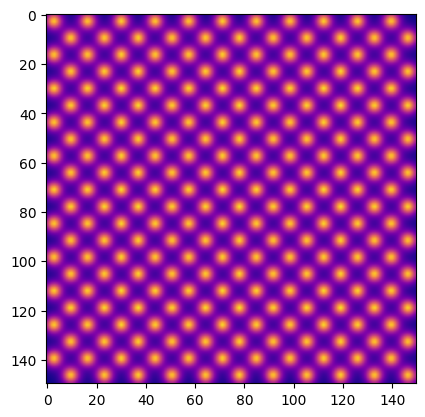

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from jarvis.analysis.stem.convolution_apprx import STEMConv
from jarvis.db.figshare import data, get_jid_data
import matplotlib.pyplot as plt
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.lattice import get_2d_lattice
%matplotlib inline
#plt.switch_backend("agg")

#graphene
a = relaxed.atoms #Atoms.from_dict(get_jid_data("JVASP-667")["atoms"])
p = STEMConv(atoms=a,output_size=[150,150]).simulate_surface(a)

plt.imshow(p[0], interpolation="gaussian", cmap="plasma")
# plt.savefig("stem_example.png")
# plt.close()

## Generate X-ray diffraction pattern for structure above

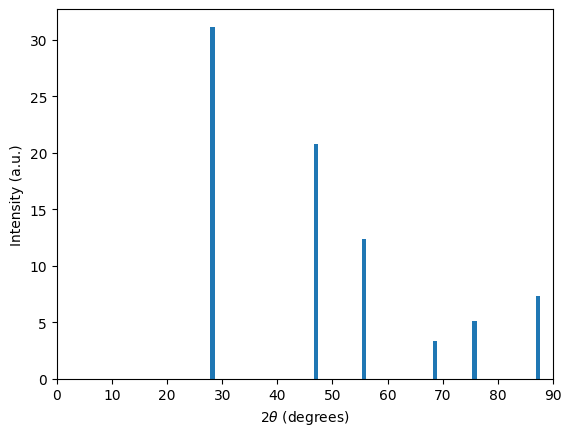

In [ ]:
from jarvis.analysis.diffraction.xrd import XRD
theta,d_hkls,intens = XRD().simulate(atoms=relaxed.atoms)
import matplotlib.pyplot as plt
plt.bar(theta, intens)
plt.xlim(0, 90)
plt.xlabel(r'2$\theta$ (degrees)')
plt.ylabel('Intensity (a.u.)')
plt.show()
